# Labeled Faces in the Wild

http://vis-www.cs.umass.edu/lfw/

## このデータベースを利用する目的：

制御された撮影環境にによる画像のデータベースではなく、さまざまな撮影環境で撮影された画像セットに対する顔の検出・顔の照合に使われるデータベース。近年、画像認識技術の評価に用いられることが増えてきている。

## 評価上の注意：

- 東洋人の顔が少ない。
- 既に顔画像が正規化されている。両目の位置は既に一致するようになっている。
- rollの評価は、別途画像を回転させて検出率を評価すること。
- 有名人の画像であるので、その同じ有名人が既に検出などの学習の被写体として利用されている可能性がある。
- 報道などの撮影で用いられた画像とみられるので、フォーカスや画像の明るさなどは確保された画像になっている比率が高い。

顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [1]:
%matplotlib inline
import pandas as pd



In [2]:
import inference_file_face
import glob
dataset = "lfw"
names = glob.glob("lfw/lfw/*/*.jpg")

degs=(-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45)


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#names = names[:20]
#degs=( -20, 0, 20)
#degs = (45, )

In [4]:
names.sort()
for deg in degs:
    inference_file_face.processDatabase(dataset, names, deg)

# Labeled Faces in the Wild dataset の検出処理後のデータ解析

In [5]:
degs=(-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45)
dfs={}
for deg in degs:
    dfs[deg] = pd.read_csv("log_lfw_%d.csv" % deg)
    print deg, dfs[deg]["num"].mean()

-45 0.4154008917101186
-40 0.5838434217486587
-35 0.7312778659412076
-30 0.8625406181515907
-25 0.904027809264717
-20 0.9557167686843497
-15 0.9740043829819391
-10 0.9671276354568125
-5 0.9750623441396509
0 1.0086148265699388
5 0.9809566991611879
10 0.9706037935464369
15 0.9532230030983149
20 0.9053124763847956
25 0.8187107987606741
30 0.7902969848107005
35 0.6650041562759768
40 0.5404670142824757
45 0.3910677850827477


In [6]:
rates = [dfs[deg]["num"].mean() for deg in degs]
data = {"degs":degs, "rates":rates}
df = pd.DataFrame(data, columns=["degs", "rates"])

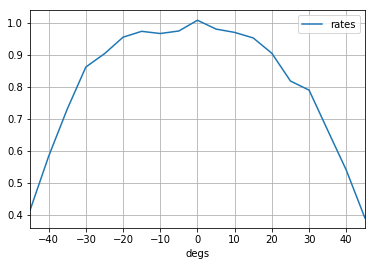

In [7]:
df.plot(x="degs", y="rates", grid=True)

### 誤検出データの扱いをしていないので、間違った評価になってしまっている。